SVM - (kernel)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

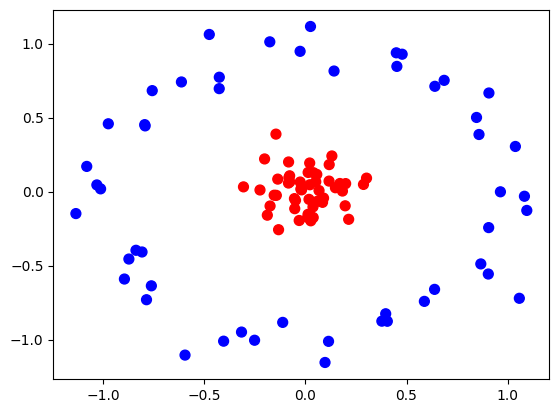

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [9]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-9-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


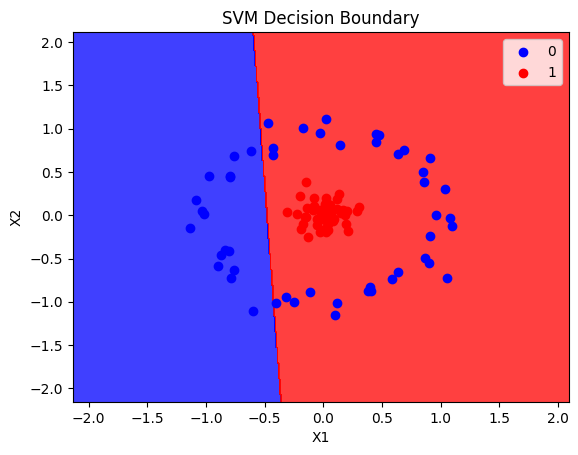

In [10]:
plot_decision_boundary(X, y, classifier)

In [11]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

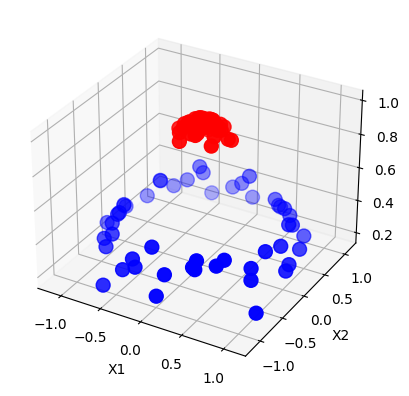

In [12]:
plot_3d_plot(X,y)

In [13]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-9-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


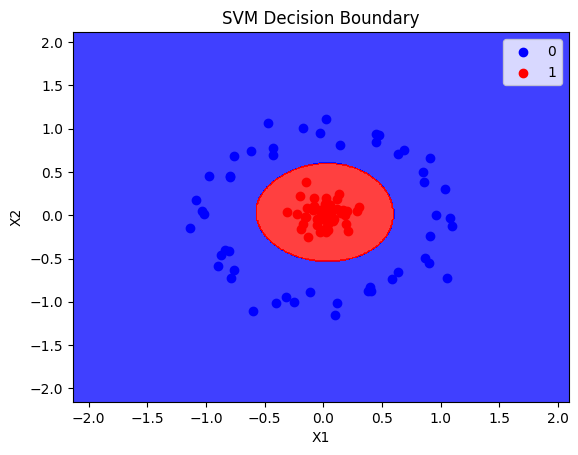

In [15]:
plot_decision_boundary(X, y, rbf_classifier)

In [16]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-9-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


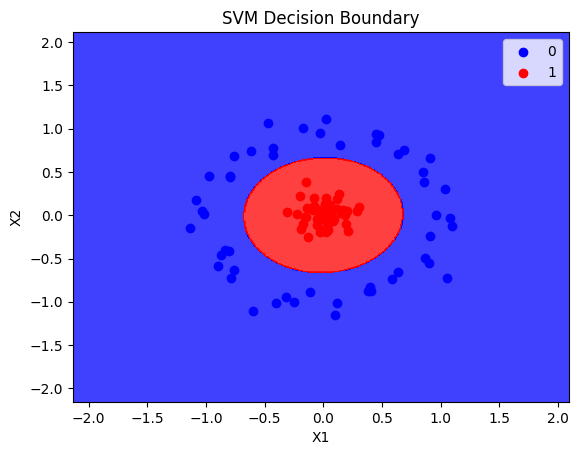

In [18]:
plot_decision_boundary(X, y, poly_classifier)

In [19]:
X

array([[-8.18500901e-02,  9.54205628e-02],
       [-7.57803256e-01,  6.82615507e-01],
       [-1.54562959e-01, -2.42010590e-02],
       [-1.88543996e-01, -1.59156280e-01],
       [ 1.16858086e-01,  7.12397389e-02],
       [-6.13390902e-01,  7.41189005e-01],
       [ 2.22673036e-02, -1.61736261e-01],
       [-4.26037610e-01,  7.73243920e-01],
       [-1.03169460e+00,  4.53695248e-02],
       [ 3.96957038e-01, -8.25307983e-01],
       [ 6.40079852e-01,  7.11860001e-01],
       [-5.95588201e-01, -1.10464169e+00],
       [-2.51578852e-01, -1.00430744e+00],
       [ 1.14262872e-01, -1.01180916e+00],
       [ 6.86064581e-01,  7.52127450e-01],
       [-8.08247834e-01, -4.07851804e-01],
       [-7.86112228e-01, -7.30351900e-01],
       [ 3.83753514e-02, -1.74933794e-01],
       [-9.75031023e-01,  4.58591850e-01],
       [-7.74262946e-02,  6.63540905e-02],
       [-1.74944741e-01, -9.70010720e-02],
       [ 9.06277514e-01, -2.43053667e-01],
       [ 5.10568252e-02,  6.67412579e-02],
       [ 1.

In [20]:
np.exp(-(X**2)).sum(1)

array([1.9842592 , 1.19064809, 1.97580787, 1.94006301, 1.98137476,
       1.26375032, 1.97368484, 1.3839735 , 1.34288064, 1.36025602,
       1.26630148, 0.99652738, 1.30338647, 1.3462713 , 1.19253941,
       1.36709997, 1.12563522, 1.96839008, 1.19681186, 1.98962992,
       1.96049287, 1.38247833, 1.99295211, 1.92657155, 1.2512177 ,
       1.95367894, 1.99228634, 1.28171183, 1.99010886, 1.98339181,
       1.49480782, 1.95058423, 1.9698193 , 1.97429101, 1.96837996,
       1.25379573, 1.35789703, 1.15407192, 1.92095859, 1.95300265,
       1.99511831, 1.2870923 , 1.98962836, 1.97756664, 1.20905467,
       1.28448244, 1.99737501, 1.98313449, 1.98250086, 1.98403241,
       1.31117102, 1.96706208, 1.91854597, 1.98219345, 1.30361982,
       1.44976878, 1.96119803, 1.12118139, 1.91233685, 1.31153919,
       1.34619304, 0.92130959, 1.99543905, 1.33164843, 1.98808545,
       1.23185837, 1.9184753 , 1.96279455, 1.30840451, 1.40625798,
       1.99482398, 1.90447579, 1.25902716, 1.08007829, 1.83875

In [21]:
X_new=np.exp(-(X**2))

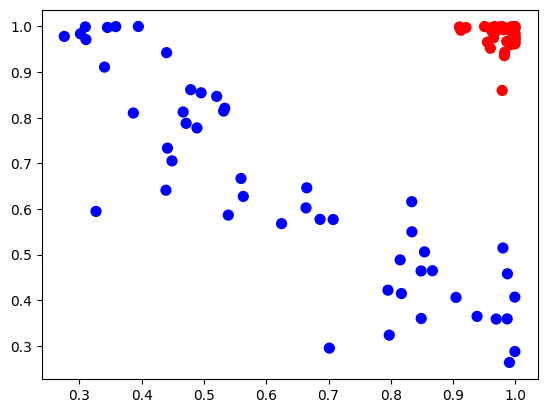

In [22]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')